In [3]:
from tqdm import tqdm
import numpy as np
from requests import get
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict
from pprint import pprint as pp

In [5]:
def meta_url(datasetID: str,flavor: str = 'json') -> Dict: 
    meta_url: str = f"http://www.neracoos.org/erddap/info/{datasetID}/index.{flavor}"
    return get(meta_url).json() 
def data_url(datasetID: str, flavor: str = 'json') -> Dict:
    data_url: str = f"http://www.neracoos.org/erddap/tabledap/{datasetID}.{flavor}"
    return get(data_url).json() 
GOM_IDS = ["A01"]

In [6]:
META_DATA: Dict = data_url('allDatasets')
meta_0: pd.DataFrame = pd.DataFrame(META_DATA['table']['rows'],columns=META_DATA['table']['columnNames'])

,datasetID,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude,maxLongitude,longitudeSpacing,...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
0,allDatasets,public,NERACOOS,table,Other,EDDTableFromAllDatasets,* The List of All Active Datasets in this ERDD...,NaN,NaN,NaN,...,,,http://www.neracoos.org/erddap/info/allDataset...,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap,http://www.neracoos.org/erddap/rss/allDatasets...,,,NaN,This dataset is a table which has a row of inf...
1,A01_aanderaa_hist,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Historic Surface Currents,-70.56522,-70.56522,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
2,A01_aanderaa_o2_all,public,"Department of Physical Oceanography, School of...",table,TimeSeries,EDDTableFromNcCFFiles,A01 Aanderaa - Realtime Surface Currents and O2,-70.56640,-70.56550,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_aander...,(local files),http://gyre.umeoce.maine.edu/data/gomoos/buoy/...,http://www.neracoos.org/erddap/rss/A01_aandera...,,,NaN,Ocean observation data from the Northeastern R...
3,A01_accelerometer_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Accelerometer - Waves,-70.56606,-70.56550,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_accele...,(local files),http://www.neracoos.org,http://www.neracoos.org/erddap/rss/A01_acceler...,,,NaN,Ocean observation data from the Northeastern R...
4,A01_waves_mstrain_all,public,Univ. of Maine,table,TimeSeries,EDDTableFromNcCFFiles,A01 Directional Waves,-70.56550,-70.56550,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/A01_waves_...,(local files),http://www.neracoos.org/,http://www.neracoos.org/erddap/rss/A01_waves_m...,,,NaN,Ocean observation data from the Northeastern R...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,WHOI_ESP_DENNIS_CTD,public,Woods Hole Oceanographic Institute - The Ander...,table,TimeSeries,EDDTableFromAsciiFiles,WHOI ESP - DENNIS CTD (provisional),-69.45470,-69.45470,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_D...,(local files),https://www.whoi.edu,http://www.neracoos.org/erddap/rss/WHOI_ESP_DE...,,,NaN,MERHAB: GOM-ESP DENNIS CTD
213,WHOI_ESP_DON_CTD,public,Woods Hole Oceanographic Institute - The Ander...,table,TimeSeries,EDDTableFromAsciiFiles,WHOI ESP - DON CTD (provisional),-70.44330,-70.44330,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_D...,(local files),https://www.whoi.edu,http://www.neracoos.org/erddap/rss/WHOI_ESP_DO...,,,NaN,MERHAB: GOM-ESP DON CTD
214,WHOI_ESP_JAKE_CTD,public,Woods Hole Oceanographic Institute - The Ander...,table,TimeSeries,EDDTableFromAsciiFiles,WHOI ESP - JAKE CTD (provisional),-69.97680,-69.97680,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/x...,http://www.neracoos.org/erddap/metadata/iso191...,http://www.neracoos.org/erddap/info/WHOI_ESP_J...,(local files),https://www.whoi.edu,http://www.neracoos.org/erddap/rss/WHOI_ESP_JA...,,,NaN,MERHAB: GOM-ESP JAKE CTD
215,UCONN_WLIS_MET,public,University of Connecticut,table,TimeSeries,EDDTableFromErddap,WLIS Buoy Meteorology Data,-73.58010,-73.58010,NaN,...,http://www.neracoos.org/erddap/metadata/fgdc/

In [7]:
meta = meta_0.loc[meta_0['title'].str.contains('|'.join(GOM_IDS))].set_index('datasetID')

In [8]:
meta.columns

Index(['accessible', 'institution', 'dataStructure', 'cdm_data_type', 'class',
       'title', 'minLongitude', 'maxLongitude', 'longitudeSpacing',
       'minLatitude', 'maxLatitude', 'latitudeSpacing', 'minAltitude',
       'maxAltitude', 'minTime', 'maxTime', 'timeSpacing', 'griddap', 'subset',
       'tabledap', 'MakeAGraph', 'sos', 'wcs', 'wms', 'files', 'fgdc',
       'iso19115', 'metadata', 'sourceUrl', 'infoUrl', 'rss', 'email',
       'testOutOfDate', 'outOfDate', 'summary'],
      dtype='object')

In [9]:
active_datasets = list(meta[meta['maxTime'].str.contains('2020')].index)
active_datasets

['A01_aanderaa_o2_all',
 'A01_accelerometer_all',
 'A01_waves_mstrain_all',
 'A01_met_all',
 'A01_optics_s_all',
 'A01_optode_all',
 'A01_doppler_rt',
 'A01_sbe16_disox_all',
 'A01_sbe37_all']

In [10]:
meta['cdm_data_type']

datasetID
A01_aanderaa_hist               TimeSeries
A01_aanderaa_o2_all             TimeSeries
A01_accelerometer_all           TimeSeries
A01_waves_mstrain_all           TimeSeries
A01_met_all                     TimeSeries
A01_optics_s_all                TimeSeries
A01_optode_all                  TimeSeries
A01_doppler_rt           TimeSeriesProfile
A01_sbe16_trans_all             TimeSeries
A01_sbe16_disox_all             TimeSeries
A01_sbe37_all                   TimeSeries
Name: cdm_data_type, dtype: object

In [37]:
raw_dict1 = data_url('A01_optics_s_all')['table']

In [38]:
A01_df = pd.DataFrame(raw_dict1['rows'],columns = raw_dict1['columnNames'])

In [29]:
raw_dict = data_url('A01_aanderaa_o2_all')['table']

In [30]:
E01_df = pd.DataFrame(raw_dict['rows'],columns = raw_dict['columnNames'])

In [40]:
plt.scatter(A01_df[-100:]['time'],A01_df[-100:]['salinity'])

KeyError: 'salinity'

In [39]:
plt.scatter(A01_df[-100:]['time'],A01_df[-100:]['salinity'])

KeyError: 'salinity'

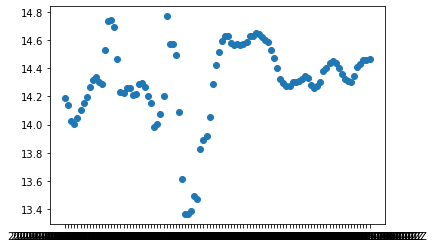

In [35]:
plt.scatter(E01_df[-100:]['time'],E01_df[-100:]['temperature'])

AttributeError: 'PathCollection' object has no property 'rotation'

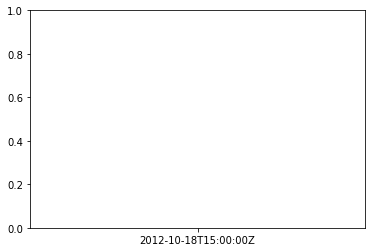

In [25]:
plt.scatter(E01_df[-100:]['time'],E01_df[-100:]['temperature'],rotation=90)

In [306]:
light1 = [1.5,1.7,2.4,3.3,3.5]
dark1 = [4.3,3.6,3.3,2.4]
print('light 1:',np.mean(light1))
print('dark 1:',np.mean(dark1))
light2 = [1.2,1.1,.7,2.0,1.4]
dark2 = [.6,.6,.6,1.0,1.0]
dark2_x = [2,2.1,2.2,2,2.1]
print('light 2:',np.mean(light2))
print('dark 2:',np.mean(dark2))
data = list(zip(light1,[1 for x in range(5)])) + list(zip(dark1,[0 for x in range(4)]))
data += list(zip(light2,[3 for x in range(5)])) + list(zip(dark2,[dark2_x[x] for x in range(5)]))
data = pd.DataFrame(data)

light 1: 2.4799999999999995
dark 1: 3.4
light 2: 1.28
dark 2: 0.76


In [237]:
def aad(arr):
    mean = np.mean(arr)
    total_dev = 0
    for i in arr:
        total_dev += abs(mean-i)
    return total_dev/len(arr)

In [309]:
all_points = [dark1,light1, dark2, light2]
changed_color = [0,1,2,4]
no_grow = [14,15,16]
no_change = [x for x in range(len(data)) if (x not in changed_color and x not in no_grow)]

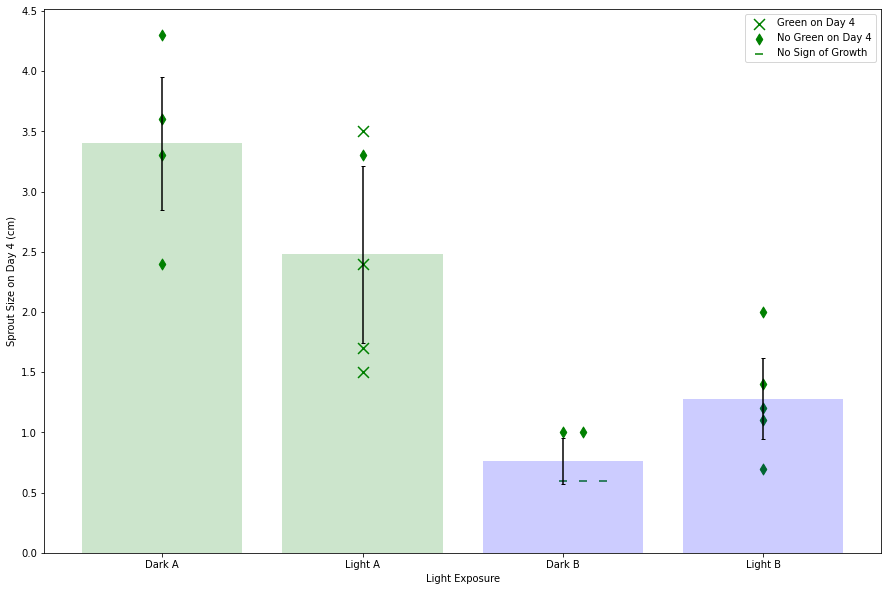

In [312]:
labels = ['Dark A','Light A','Dark B','Light B']
means = [np.mean(x) for x in all_points]
fig, ax1 = plt.subplots(figsize = (15,10))
ax1.bar(labels,means,color=['g','g','b','b'],alpha=.2,yerr=[aad(x) for x in all_points],capsize=2)
#ax1.scatter(data[1].loc[changed_color],data[0].loc[changed_color],marker='o',c='g')
ax1.scatter(data[1].loc[changed_color],data[0].loc[changed_color],marker='x',s=120,c='g',label = 'Green on Day 4')
ax1.scatter(data[1].loc[no_change],data[0].loc[no_change],marker='d',c='g',s=60,label = 'No Green on Day 4')
ax1.scatter(data[1].loc[no_grow],data[0].loc[no_grow],marker='_',c='g',s=60,label = 'No Sign of Growth')
# ax2.bar([],[],edgecolor='g',alpha=.2,yerr=[aad(dark2),aad(light2)],capsize=2)
# ax2.scatter(data2[1],data2[0],c='g')
ax1.set_ylabel('Sprout Size on Day 4 (cm)')
ax1.set_xlabel('Light Exposure')
ax1.legend()
ax1.set_yticks(np.arange(0, 5, step=0.5))
plt.show()

In [308]:
data

,0,1
0,1.5,1.0
1,1.7,1.0
2,2.4,1.0
3,3.3,1.0
4,3.5,1.0
5,4.3,0.0
6,3.6,0.0
7,3.3,0.0
8,2.4,0.0
9,1.2,3.0
